In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
#importing dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/Datasets/spam_email.csv', encoding='utf-8')
except UnicodeDecodeError:
    # Try an alternative encoding if utf-8 fails
    df = pd.read_csv('/content/drive/MyDrive/Datasets/spam_email.csv', encoding='latin1')

In [4]:
#displaying dataset
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#data preprocessing
#dropping unnecessary null columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#dropping null rows
df.dropna()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#displaying dataset after preprocessing
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#encoding spam as 0 and ham as 1
df['v1'] = df['v1'].map({'spam': 0, 'ham': 1})
df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#separating features and target
X=df['v2']
y=df['v1']

In [12]:
#splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#converting text into numericals using Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit and transform the training data, transform the test data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [14]:
print(X_train_features)

  (0, 4520)	0.4658046386365619
  (0, 3210)	0.348722265231364
  (0, 7415)	0.348722265231364
  (0, 1706)	0.3431839629173582
  (0, 4416)	0.4528381701109944
  (0, 1371)	0.4658046386365619
  (1, 0)	0.2654936554684193
  (1, 1649)	0.3059746053542906
  (1, 6440)	0.2953742837684993
  (1, 4533)	0.3059746053542906
  (1, 419)	0.28715203556385105
  (1, 4292)	0.2953742837684993
  (1, 5005)	0.1937920260229529
  (1, 2661)	0.3059746053542906
  (1, 1533)	0.2015782058421696
  (1, 6296)	0.269833648032668
  (1, 3631)	0.2804339696184593
  (1, 3140)	0.3059746053542906
  (1, 1187)	0.26161139982801973
  (2, 2190)	0.5102109014477275
  (2, 5351)	0.5102109014477275
  (2, 1674)	0.35156722029872034
  (2, 5770)	0.3962151014046925
  (2, 3061)	0.44585171875646595
  (3, 5484)	0.4829129976175997
  :	:
  (4451, 5740)	0.3358090891373877
  (4451, 4686)	0.3478605253385091
  (4452, 3402)	0.4536077050510107
  (4452, 3423)	0.4833413012939851
  (4452, 1579)	0.3576443319642905
  (4452, 1781)	0.3311324953642251
  (4452, 5998)	0.3

In [15]:
#training the model using logistic regression
model=LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [16]:
#accuracy on training data
prediction_on_training_data=model.predict(X_train_features)
train_accuracy=accuracy_score(y_train, prediction_on_training_data)
print("Accuracy on training data: ", train_accuracy)

Accuracy on training data:  0.9694862014808167


In [17]:
#accuracy on testing data
y_pred=model.predict(X_test_features)
test_accuracy=accuracy_score(y_test, y_pred)
print("Accuracy on test data: ", test_accuracy)

Accuracy on test data:  0.9524663677130045


In [19]:
#testing the model
input_mail=["You got a free offer of 10 lakh rupees. click on the link below..."]
input_mail_features=feature_extraction.transform(input_mail)
prediction=model.predict(input_mail_features)
print(prediction)
if(prediction[0]==1):
  print("Spam mail")
else:
  print("Not spam")

[1]
Spam mail


In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[100  50]
 [  3 962]]


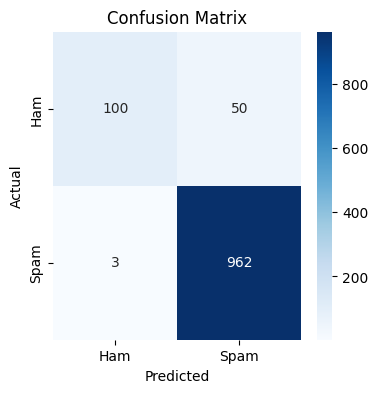

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
